In [1]:
# Bibliotecas
import cv2
import os
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

In [2]:
# Lendo imagens e sicronizando com IDs;
def get_imgs():

    paths = [os.path.join("yalefaces", f) for f in os.listdir("yalefaces")]
    faces = []
    ids = []

    for path in paths:
        img = Image.open(path).convert('L')
        img_np = np.array(img, 'uint8')
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        ids.append(id)
        faces.append(img_np)
    return np.array(ids), faces

In [3]:
# Pegando Ids e Imgens;
ids, faces = get_imgs()

# Carregando classificador;
lbph = cv2.face.LBPHFaceRecognizer_create()
# treinando LBPH;
lbph.train(faces, ids)
# Salvando LBPH;
lbph.write('classificadorLBPH.yml')

In [11]:
# Carregadno classificador;
lbph.read("classificadorLBPH.yml")
# imagem para teste;
imagem = Image.open("yalefaces/subject02.sad").convert("L")
# trannsformando imagem;
imagem_np = np.array(imagem,"uint8")

# realizando previsãp;
predId, _ = lbph.predict(imagem_np)
predId

2

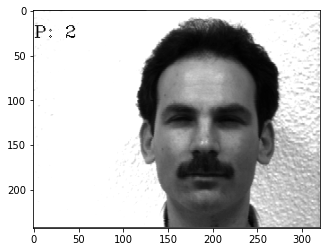

In [29]:
cv2.putText(imagem_np,'P: ' + str(predId), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
plt.imshow(imagem_np,"gray")